
# Kaggle Survey 2020

<a id="table-of-contents"></a>

1.  [Introduction](#introduction)
2.  [Data Preparation](#data-preparation)
3.  [What is the difference between job titles?](#jobtitles)
    * 3.1. [Different titles, different activities](#jobtitles-activites)
    * 3.2. [Different titles, different career path](#jobtitles-career)
    * 3.3. [Who makes more money?](#jobtitles-compensation)
4.  [Which skills or tools do you need?](#skills)
    * 4.1 [Based on job title](#skills-jobtitle)
    * 4.2 [Based on country](#skills-country)
    * 4.3 [Based on company size](#skills-company)
5. [Whcih career is good for you to pursue based on your skills?](#classification)
6. [How much can I earn based on your skills?](#regression)
7. [Conclusion](#conclusion)

<a id="introduction"></a>
[back to top](#table-of-contents)

## 1. Introduction

![main-image](magnet-me-LDcC7aCWVlo-unsplash.jpg)
<span>Photo by <a href="https://unsplash.com/@magnetme?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Magnet.me</a> on <a href="https://unsplash.com/s/photos/data-professional?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>


당신이 데이터 프로페셔널을 추구하고 있다면, 아마도 나와 같은 의문을 가졌을 것이다. 세상에는 데이터와 관련해서 다양한 종류의 직종이 있고, 거기에 따라 요구되는 스킬이나 경력도 다르기 때문이다. 도대체 나한테는 어떤 직종이 어울릴까? 무엇을 배워야 할까? 나는 미래어 얼마만큼이나 벌 수 있을 가? 카글 설문조사 데이터를 분석하여 우리의 질문에 답해보자! 

구체적으로 아래 질문들에 대해 알아보도록 하자. 

- There are many titles related to data professionals, what is the difference? 
- What kind of programming languages or tools do you need? 
- What kind of title is good for you to pursue based on my current or future skill sets? (classification)
- How much can I expect my future salary based on my current or future skill sets? (Linear REgression) 



<a id="data-preparation"></a>
[back to top](#table-of-contents)

## 2. Data Preparation 



In [185]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

plt.rcParams['figure.dpi'] = 200 #high resolution

In [186]:
# read dataset to Pandas Data Frame
df_raw = pd.read_csv(r"C:\Users\suhon\Documents\Data Scientist Nanodegree\KaggleSurvey2020-Analysis\kaggle-survey-2020\kaggle_survey_2020_responses.csv")
# df = pd.read_csv(/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
df_raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
# Data Frame formating 
# From the overview of the raw dataset, the questions are located in the first row, and the first column (Duration) is not relevant for this anlaysis. Note that multiple choice responces are already separated in each columns.

# delete the first row and save it into the list 
list_questions = list(df_raw.iloc[0])
df = df_raw.drop(df.index[0], axis=0)

print(list_questions[:5])
# delete the first column 
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

['Duration (in seconds)', 'What is your age (# years)?', 'What is your gender? - Selected Choice', 'In which country do you currently reside?', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?']


,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
# check the basic information 
print(df.info())
# all the columns are categorical data 
print("\nNumber of categorical data = {}".format(
        len(df.select_dtypes(include=['object']).copy())))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 354 entries, Q1 to Q35_B_OTHER
dtypes: object(354)
memory usage: 54.3+ MB
None

Number of categorical data = 20036


In [189]:
# check missing values for single choice questions
columns_single = df.filter(regex="^(?!.*Part)(?!.*OTHER)").columns
df[columns_single].describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q24,Q25,Q30,Q32,Q38
count,20036,20036,20036,19569,19277,19120,17821,17029,16780,16374,11403,11282,11130,10729,10570,3513,1498,13290
unique,11,5,55,7,13,7,13,5,5,9,5,7,6,25,6,17,14,6
top,25-29,Man,India,Master’s degree,Student,3-5 years,Python,A personal computer or laptop,Never,Under 1 year,0-49 employees,1-2,We are exploring ML methods (and may one day p...,$0-999,$0 ($USD),MySQL,Tableau,"Local development environments (RStudio, Jupyt..."
freq,4011,15789,5851,7859,5171,4546,14241,13348,12050,6312,4208,2645,2353,2128,3856,764,540,6107


In [190]:
# check missing values for multiple choice questions
columns_multiple = df.filter(regex="^(?=.*Part)|(?=.*OTHER)").columns
df[columns_multiple].describe()

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,...,1177,494,430,3199,557,480,846,519,3082,251
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,...,1177,494,430,3199,557,480,846,519,3082,251


<a id="jobtitles"></a>
[back to top](#table-of-contents)

## 3. What is the difference between job titles?

- 3.1. [Different titles, different activities](#jobtitles-activites)
- 3.2. [Different titles, different career path](#jobtitles-career)
- 3.3. [Who makes more money?](#jobtitles-compensation)


### Job title distribution 

### Job title & Gender 

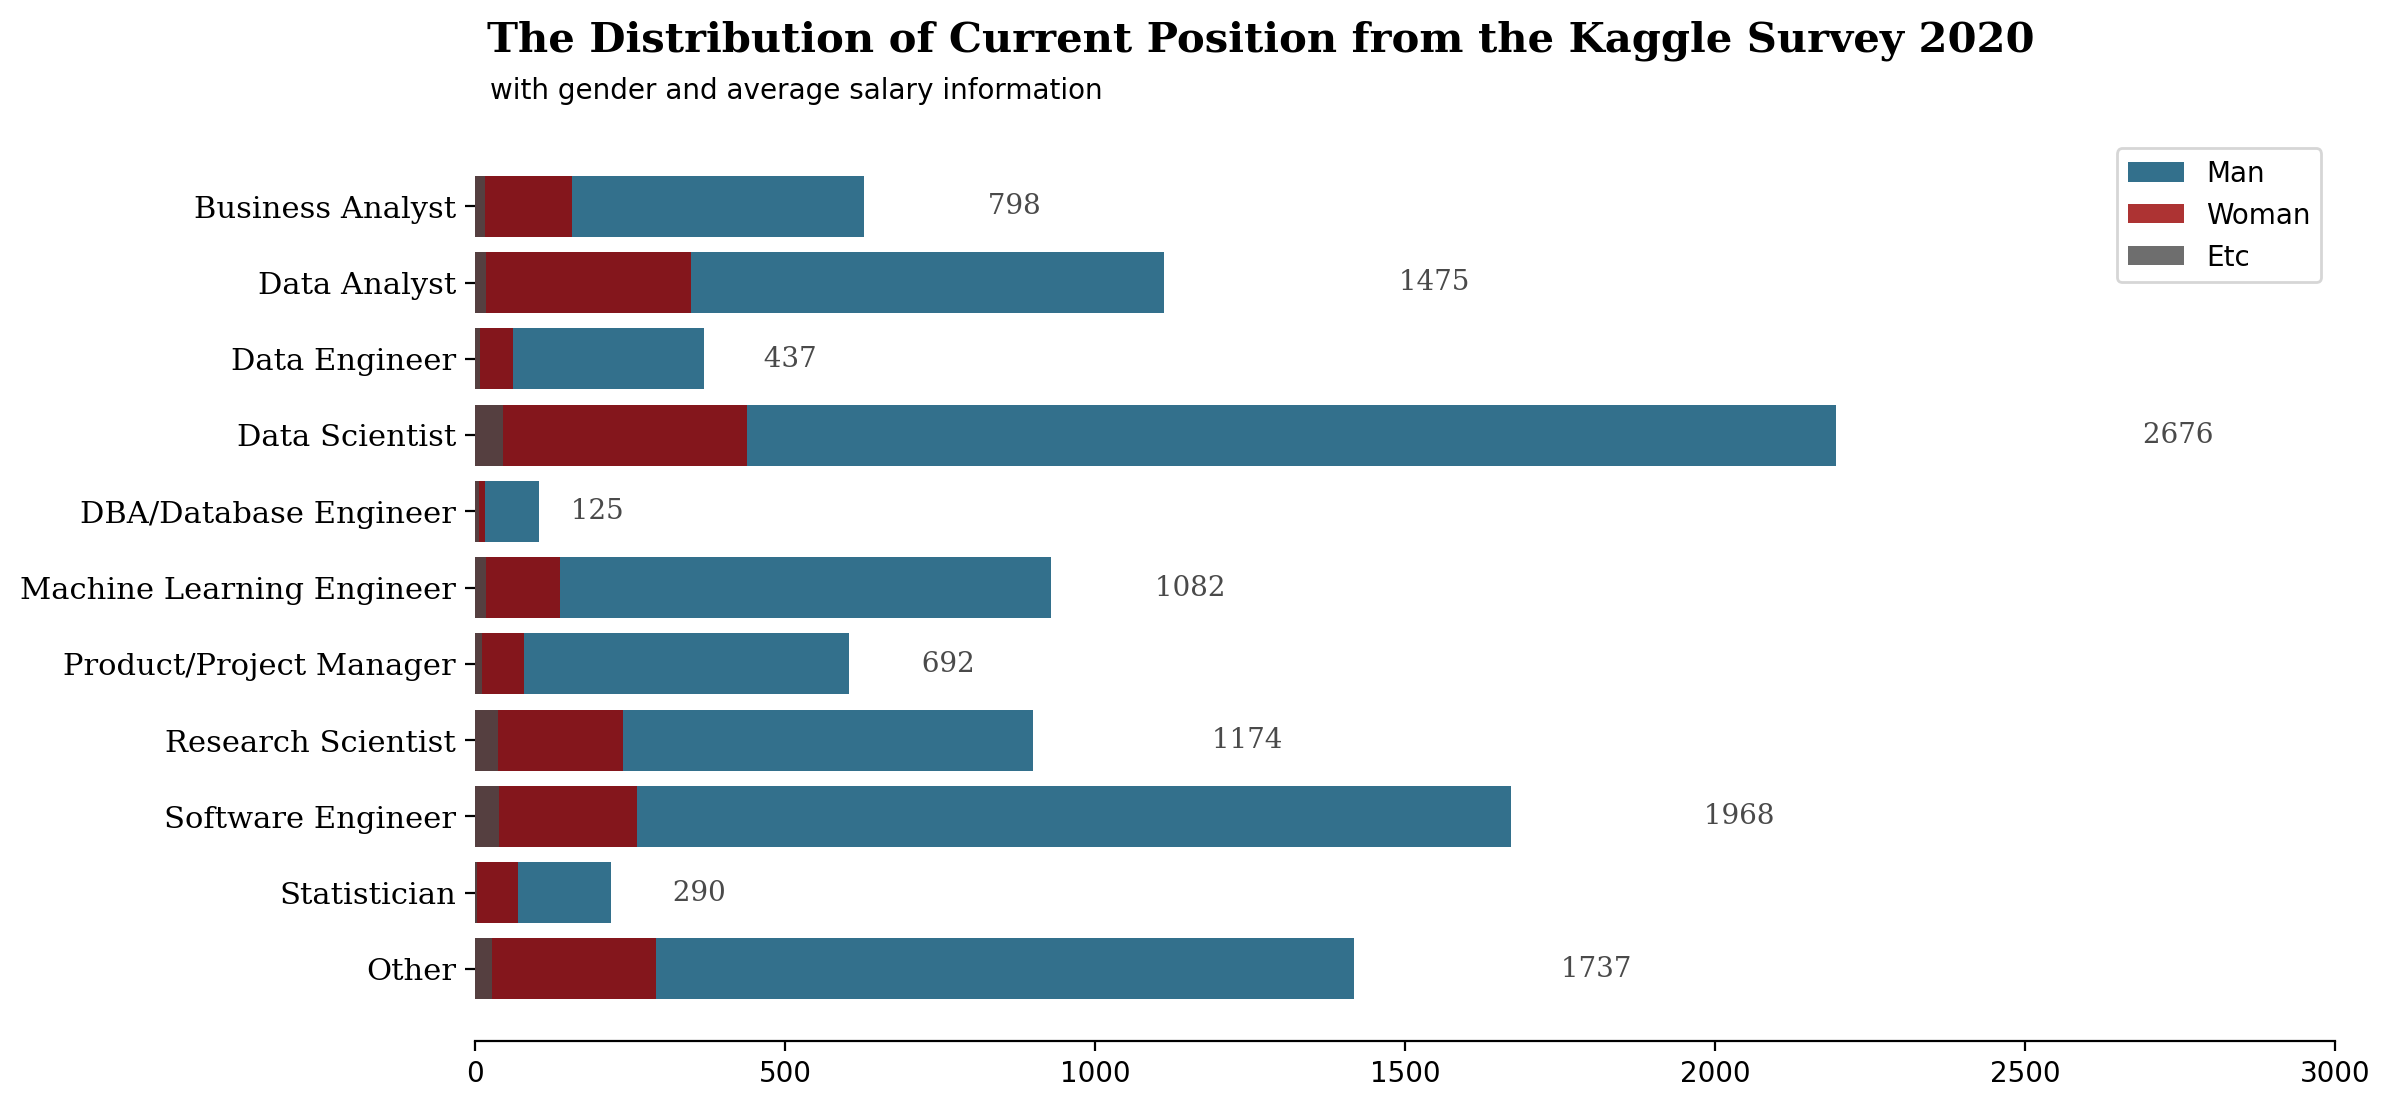

In [223]:
q5_order = [
    'Business Analyst',
    'Data Analyst', 
    'Data Engineer',
    'Data Scientist', 
    'DBA/Database Engineer',
    'Machine Learning Engineer',
    'Product/Project Manager',
    'Research Scientist',
    'Software Engineer',
    'Statistician',
    # 'Student', 
    # 'Currently not employed', 
    'Other']
q5_order = q5_order[::-1] # order is upside down when plotting a bar chart

# join gender and jobtitle data 
df_q2q5 = df[['Q2','Q5']].groupby('Q5')['Q2'].value_counts().unstack().loc[q5_order]
df_q2q5['total'] = df_q2q5.sum(axis=1)

# group gender categries into ['Man', 'Woman', 'Etc']
etc_columns = [x for x in df['Q2'].unique() if x not in ['Man', 'Woman']]
df_q2q5['Etc'] = df_q2q5[etc_columns].sum(axis=1)
df_q2q5.drop(columns=etc_columns, axis=1, inplace=True)

# plot barchart 
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.barh(df_q2q5.index, df_q2q5['Man'], color='#004c70', alpha=0.8, label='Man')
ax.barh(df_q2q5.index, df_q2q5['Woman'], color='#990000', alpha=0.8, label='Woman')
ax.barh(df_q2q5.index, df_q2q5['Etc'], color='#4a4a4a', alpha=0.8, label='Etc')

ax.set_xlim(0, 3000)
# ax.set_xticks([])
ax.set_yticklabels(df_q2q5.index, fontfamily='serif', fontsize=11)
for i in df_q2q5.index: 
    ax.annotate(f"{df_q2q5['total'][i]:5.0f}",
                xy=(df_q2q5['total'][i], i), 
                va = 'center', ha='left', fontweight='light', fontfamily='serif',
                color='#4a4a4a')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

fig.text(0.13, 0.95, 'The Distribution of Current Position from the Kaggle Survey 2020', 
            fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.91, 'with gender and average salary information')
ax.legend()
plt.show()


In [224]:
df_q2q5

Q2,Man,Woman,total,Etc
Q5,,,,
Other,1418.0,292.0,1737.0,27.0
Statistician,219.0,69.0,290.0,2.0
Software Engineer,1670.0,260.0,1968.0,38.0
Research Scientist,899.0,239.0,1174.0,36.0
Product/Project Manager,603.0,78.0,692.0,11.0
Machine Learning Engineer,928.0,136.0,1082.0,18.0
DBA/Database Engineer,103.0,16.0,125.0,6.0
Data Scientist,2194.0,438.0,2676.0,44.0
Data Engineer,369.0,60.0,437.0,8.0


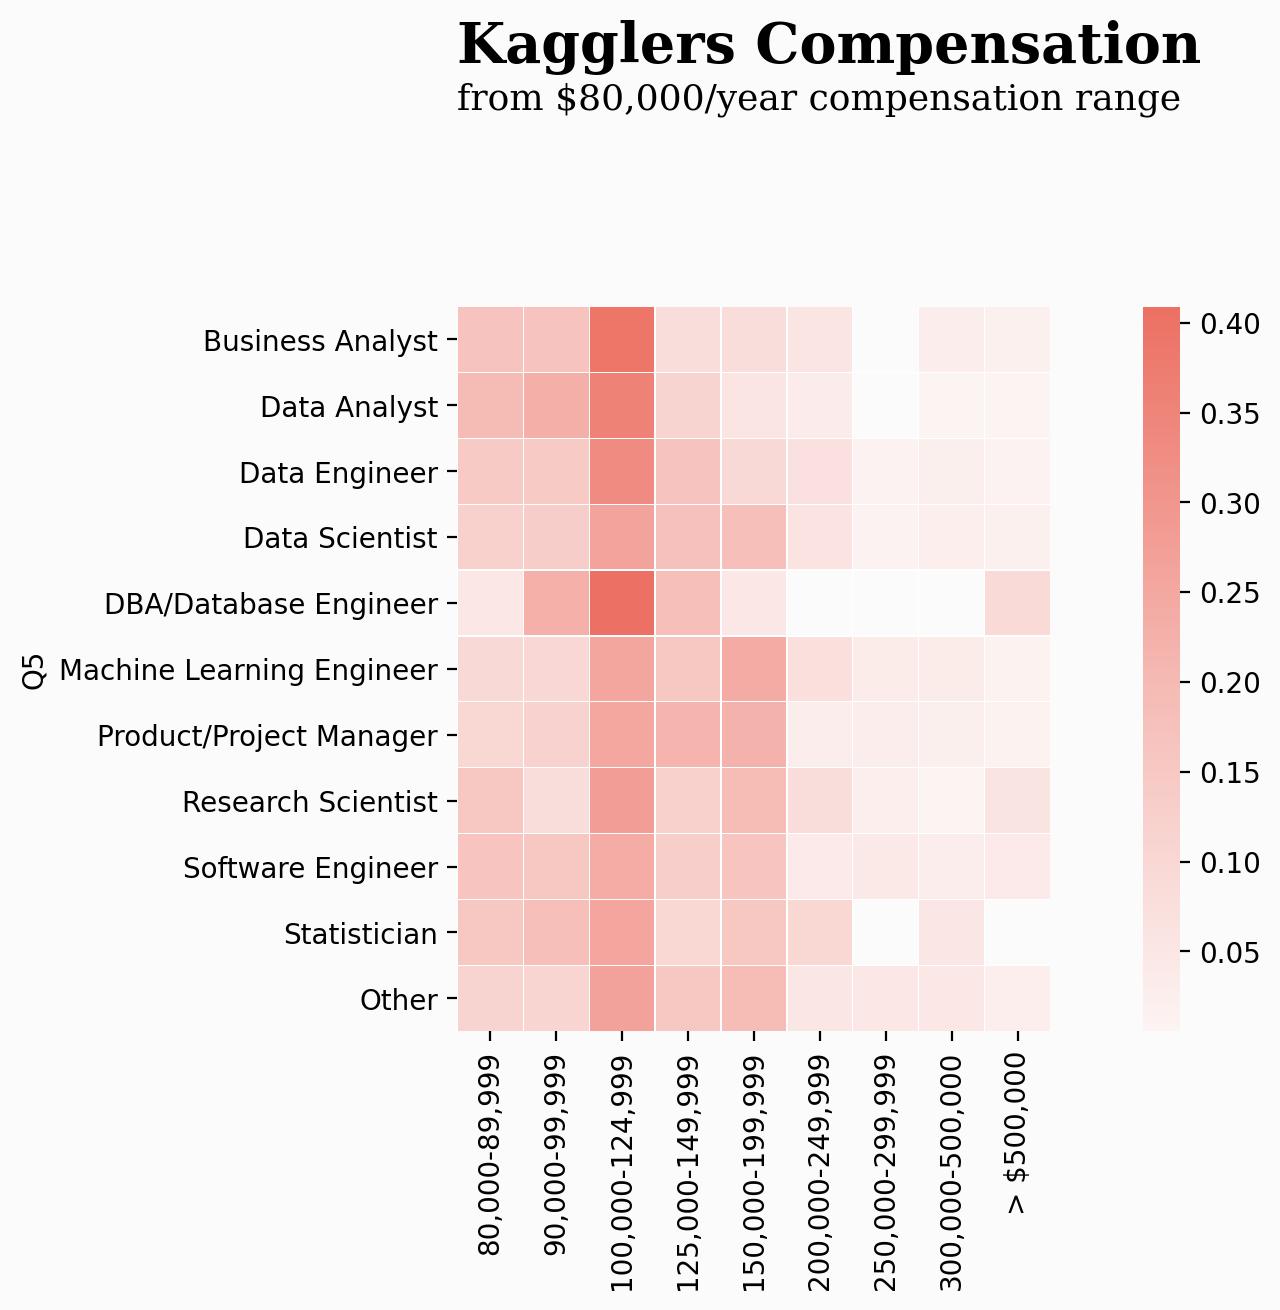

In [243]:
# compensation is categorized in the different scale. Also, the first three categories might come from false information gathering (confusion of montly or yearly), so I decide to select the range between 3000 to 500000

q24_order = [
    # "$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999",
    # "5,000-7,499", "7,500-9,999", "10,000-14,999", "15,000-19,999", 
    # "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999", 
    # "50,000-59,999", "60,000-69,999", "70,000-79,999",
    "80,000-89,999", "90,000-99,999", "100,000-124,999", "125,000-149,999", "150,000-199,999", "200,000-249,999", "250,000-299,999", "300,000-500,000", "> $500,000"]

df_q5q24 = df[['Q24', 'Q5']].dropna()
df_q5q24 = df_q5q24.groupby('Q5')['Q24'].value_counts().unstack()[q24_order].loc[q5_order[::-1]]

df_q5q24 = (df_q5q24.T / (df_q5q24.sum(axis=1) + 0.001)).T

fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=-0.75)
ax0 = fig.add_subplot(gs[0,0])

colors = ["#fcf4f3", "#f5b7b1", "#ec7063"]
colormap = mpl.colors.LinearSegmentedColormap.from_list("", colors)


sns.heatmap(ax=ax0, data=df_q5q24, linewidths=.1, square=True, 
            cbar_kws = dict(use_gridspec=False,location="right"), cmap=colormap)

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

ax0.set_xlabel("")

ax0.text(0, -3.7, 'Kagglers Compensation', 
         fontsize=20, fontweight='bold', fontfamily='serif')

ax0.text(0, -3, 'from $80,000/year compensation range', 
         fontsize=13, fontweight='light', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
